In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-12-06 21:07:51--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-12-06 21:07:51--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c5ed6536501873d2aaa0951dd.dl.dropboxusercontent.com/cd/0/inline/CI7PDxUKKfLxT-hkvzQ2O3twPCyM897jxhxlFuWUMucGx7s1LfXGbRcfZokDNlbrY1d1QTICKA_9FllR0KKqGFb5tUyJSIczkfpJ_CE11FkqnT9Ixh9FB2s4a51KXVdwTAcccIdJq2vMD2rYcVCLjvWb/file# [following]
--2023-12-06 21:07:51--  https://uc6c5ed6536501873d2aaa0951dd.dl.dropboxusercontent.com/cd/0/inline/CI7PDxUKKfLxT-hkvzQ2O3twPCyM897jxhxlFuWUMucGx7s1LfXGbRcfZokDNlbrY1d1QTICKA_9FllR0KKqGFb

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


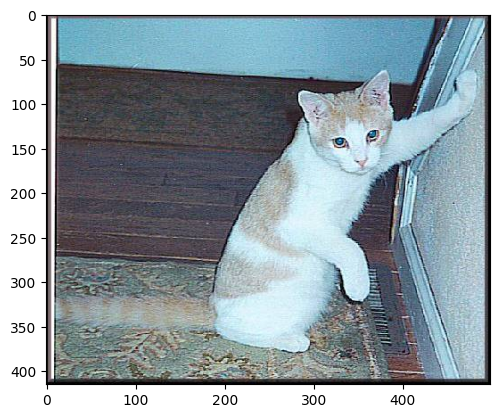

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img=npimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

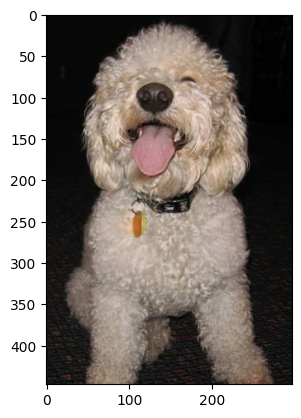

In [4]:
img=npimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
print (tensorflow.__version__)

2.14.0


In [26]:
img_width, img_height = 150, 150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_samples = 100
nb_validation_samples = 100
epochs = 50
batch_size = 20

In [27]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [28]:
train_datagen = ImageDataGenerator (rescale=1. /255, shear_range= 0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator (rescale=1. /255)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


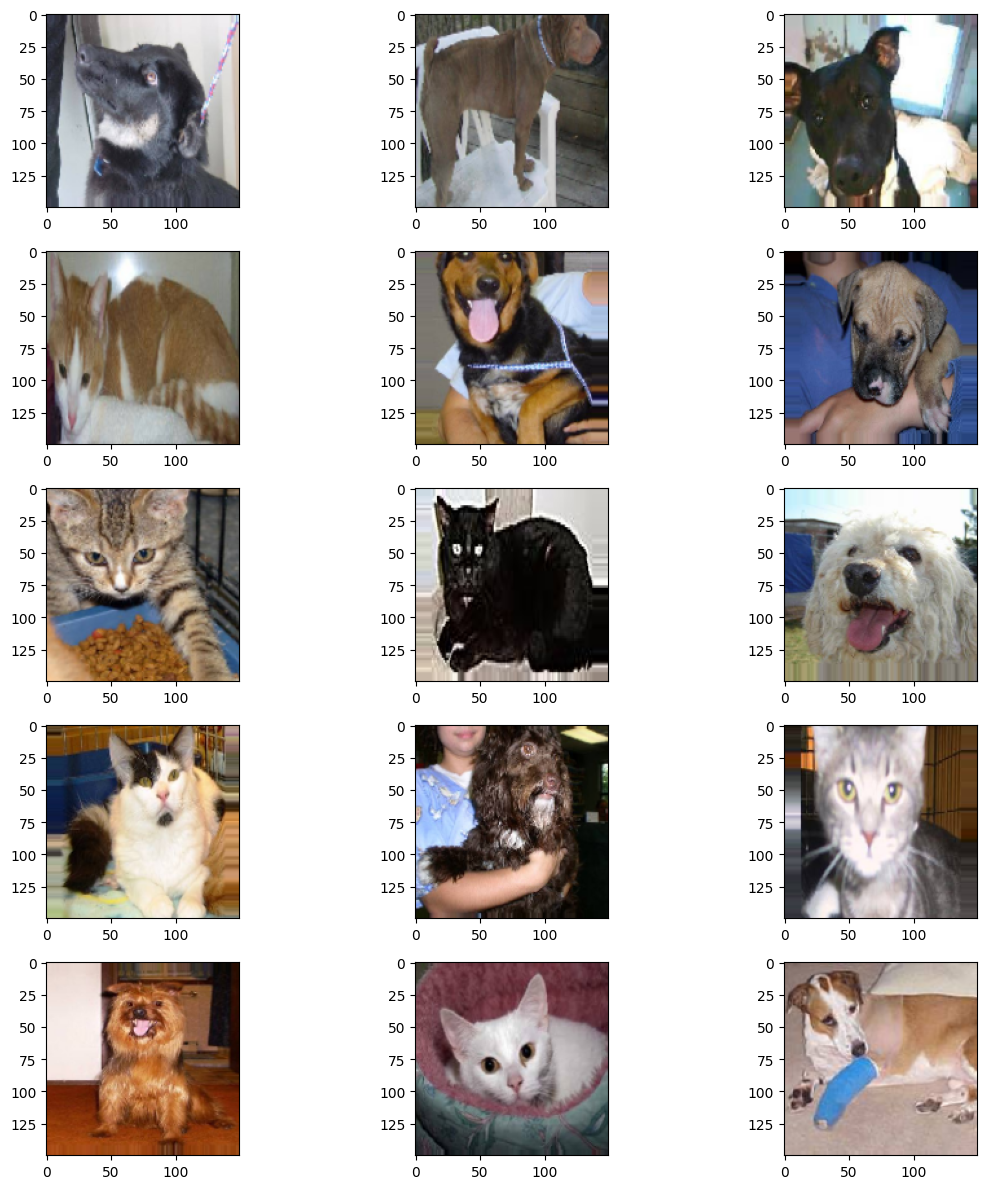

In [29]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [30]:
model = Sequential()
model.add (Conv2D(64,(3,3), input_shape = input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))  # Change to 1 unit for binary classification
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_8 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                22429760  
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                      

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_8 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                22429760  
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                      

In [32]:
training = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50
5/5 [==============================] - 3s 364ms/step - loss: 21.5506 - accuracy: 0.4700 - val_loss: 1.9053 - val_accuracy: 0.5100
Epoch 2/50
5/5 [==============================] - 2s 353ms/step - loss: 2.7480 - accuracy: 0.5700 - val_loss: 2.2078 - val_accuracy: 0.4900
Epoch 3/50
5/5 [==============================] - 1s 210ms/step - loss: 2.5956 - accuracy: 0.5200 - val_loss: 1.6626 - val_accuracy: 0.4500
Epoch 4/50
5/5 [==============================] - 1s 210ms/step - loss: 1.3242 - accuracy: 0.5600 - val_loss: 1.2124 - val_accuracy: 0.4900
Epoch 5/50
5/5 [==============================] - 1s 193ms/step - loss: 1.1119 - accuracy: 0.5400 - val_loss: 1.9796 - val_accuracy: 0.5600
Epoch 6/50
5/5 [==============================] - 1s 199ms/step - loss: 1.2628 - accuracy: 0.5700 - val_loss: 0.8469 - val_accuracy: 0.4800
Epoch 7/50
5/5 [==============================] - 1s 212ms/step - loss: 1.0648 - accuracy: 0.5200 - val_loss: 0.7201 - val_accuracy: 0.5500
Epoch 8/50
5/5 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


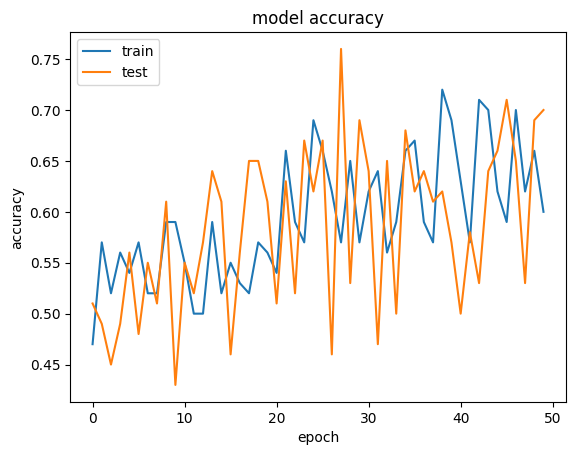

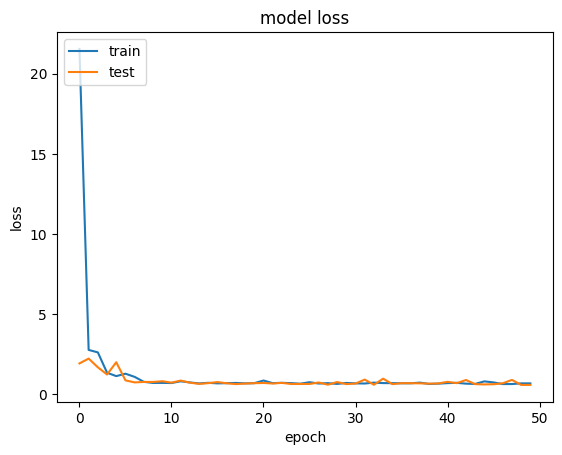

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


1/1 [==============================] - 0s 18ms/step
[[9.500418e-10]]
prediction:  cat


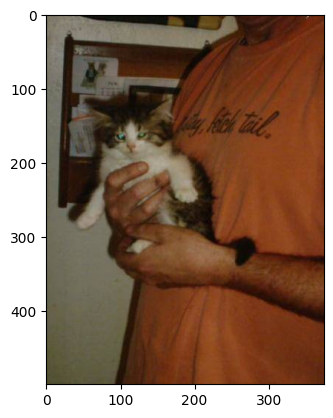

In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg", target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "cat"
print('prediction: ', prediction)


img=npimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot = plt.imshow(img)
plt.show()